In [13]:
#import the liberies 
import numpy as np
import matplotlib.pyplot as plt
#define the heatmap (all needed arguments ax = achsis, kw = keyword, kwarg= keyword-argument)
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
   
    # if not axis definded than call of gca function 
    if not ax:
        ax = plt.gca()

    # im for image, there the axis with the data is being stored 
    im = ax.imshow(data, **kwargs)
    
    #define the colar bar as colarbar 
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
   
    #show all ticks an label them with their respective list entries
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    #configure the horizontal axes for the label to appear on top of the plot 
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    # rotate the tick labels and set their alignments 
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    
    # turn off spine and create a white grid (Gitter) for the plot
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    #return the heatmap 
    return im, cbar

you can google the code, mathplotlib and copy it in 

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

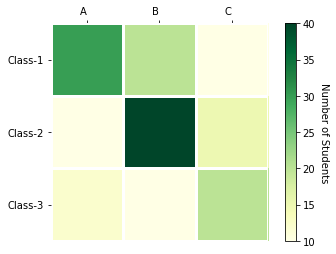

In [14]:
#define the data 
import numpy as np 
#matrix data 3x3
data = np.array([
    [30, 20, 10,],
    [10, 40, 15],
    [12, 10, 20]
])

# storing of data in image(im) and color bar (cbar)
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')


In [15]:
#this function does only add text 

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    import matplotlib
    #np.ndarry because np does not include arrays 
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/Users/anna-marietomm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


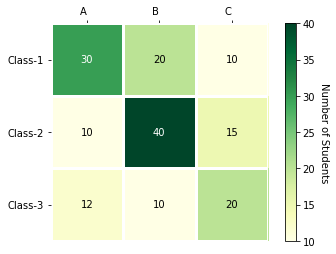

In [16]:
# pass on the data, raws are the classes, and columns are the grades, cmao = Ylgn (which collars should be used )
im, cbar = heatmap(data, ['Class-1', 'Class-2', 'Class-3'], ['A', 'B', 'C'], cmap='YlGn', cbarlabel='Number of Students')

texts = annotate_heatmap(im, valfmt="{x}")